
## Dados de medidas de Pinguins


*   Dados coletados pela Doutora Kristen Gorman e pela Palmer Station, disponíves por meio da biblioteca Seanborn 
*   Os dados são referentes a 344 pinguins de três espécies diferentes em três ilhas de um arquipelago na Antártica, entre 2007 e 2009.
*   Os atributos são
  *   Espécie
  *   Ilha
  *   Comprimento do bico
  *   Profundidade do bico
  *   Comprimento da nadadeira
  *   Massa corporal
  *   Sexo 





### 1. Importando as bibliotecas

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Carregando os dados da biblioteca Seaborn

In [80]:
# Importanto os dados
dados = sns.load_dataset("penguins") 

### 3. Conferindo o nome das variáveis e as caracteristicas do banco de dados

In [86]:
# Nome das colunas do banco de dados
dados.columns

Index(['especies', 'ilha', 'comp_bico', 'prof_bico', 'comp_nadadeira', 'massa',
       'sexo'],
      dtype='object')

Como as variáveis tem o nome em inglês e a unidade de medida junto, vamos alterar para português e remover a unidade de medida.

In [89]:
# Alterando o nome das colunas
dados.columns = ['especie', 
                'ilha', 
                'comp_bico', 
                'prof_bico',
                'comp_nadadeira', 
                'massa', 
                'sexo']


Agora vamos conferir o inicio e o final do banco de dados.

In [90]:
# Verificando o inicio do banco de dados
dados.head()

,especie,ilha,comp_bico,prof_bico,comp_nadadeira,massa,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [91]:
# Verificando o final do banco de dados
dados.tail()

,especie,ilha,comp_bico,prof_bico,comp_nadadeira,massa,sexo
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


Como foi possível verificar que existem dados faltantes nesse banco de dados, iremos remover as observações que apresentam dados faltantes.

In [92]:
# Removendo os dados faltantes
dados = dados.dropna()

### 4. Obtendo as estatísticas descritivas do banco de dados

Inicialmente de maneira conjunta

In [93]:
# Estatisticas descritivas dos dados
dados.describe()

,comp_bico,prof_bico,comp_nadadeira,massa
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


Agora vamos separar por espécie, podemos observar diferenças entre as caracterisitcas de cada espécie.

In [94]:
# Estatisticas descritivas dos dados por categoria (espécie)
dados.groupby("especie").describe()

comp_bico                             ...   massa                        
              count       mean       std   min  ...     25%     50%     75%     max
especie                                         ...                                
Adelie        146.0  38.823973  2.662597  32.1  ...  3362.5  3700.0  4000.0  4775.0
Chinstrap      68.0  48.833824  3.339256  40.9  ...  3487.5  3700.0  3950.0  4800.0
Gentoo        119.0  47.568067  3.106116  40.9  ...  4700.0  5050.0  5500.0  6300.0

[3 rows x 32 columns]

Agora vamos ver se existe diferenças entre as espécie, ilhas e sexos.

In [99]:
# Estatisticas descritivas dos dados por categoria (espécie, ilha e sexo)
dados.groupby(["especie", "ilha", "sexo"]).describe()

comp_bico             ...    massa        
                               count       mean  ...      75%     max
especie   ilha      sexo                         ...                 
Adelie    Biscoe    FEMALE      22.0  37.359091  ...  3693.75  3900.0
                    MALE        22.0  40.590909  ...  4268.75  4775.0
          Dream     FEMALE      27.0  36.911111  ...  3487.50  3700.0
                    MALE        28.0  40.071429  ...  4300.00  4650.0
          Torgersen FEMALE      24.0  37.554167  ...  3606.25  3800.0
                    MALE        23.0  40.586957  ...  4275.00  4700.0
Chinstrap Dream     FEMALE      34.0  46.573529  ...  3693.75  4150.0
                    MALE        34.0  51.094118  ...  4100.00  4800.0
Gentoo    Biscoe    FEMALE      58.0  45.563793  ...  4875.00  5200.0
                    MALE        61.0  49.473770  ...  5700.00  6300.0

[10 rows x 32 columns]

Podemos ver que somente a espécie Adelie foi observada em mais de uma ilha do arquipelago. De maneira geral podemos ver há diferenças nas médias entre machos e femeas dentro de uma mesma espécie e entre espécies.  E para a espécie Adelie não pareece haver efeito da ilha na média das caracteristicas dos pinguins. Dessa forma iremos desconsider qualquer efeito da ilha para as análises posteriores. 

### 5. Análise gráfica preliminar

Com base nos histogramas e informações anteriores, podemos observar que houve diferenças entre as amostragens de cada espécie, sendo que a espécie adelie foi a mais observada, seguinda por gentoo e então por chinstrap; Em relação ao sexo, a número de observações foi o mesmo entre os sexos masculino e feminimo, diferenciando-se dentro das espécies. 

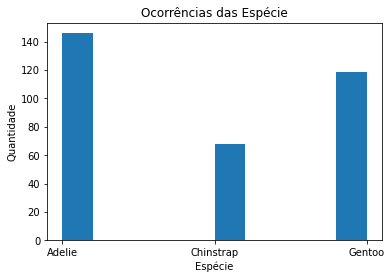

In [112]:
plt.hist(dados["especie"])
plt.xlabel('Espécie')
plt.ylabel('Quantidade')
plt.title('Ocorrências das Espécie')
plt.show()

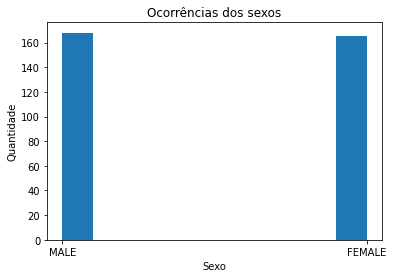

In [171]:
plt.hist(dados["sexo"])
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Ocorrências dos sexos')
plt.show()

### 6. Analisando a medida de comprimento do bico entre as espécies e sexos

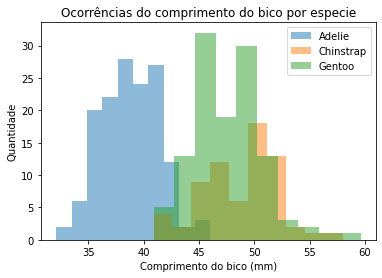

In [134]:
d1 = dados.loc[dados.especie=="Adelie", "comp_bico"]
d2 = dados.loc[dados.especie=="Chinstrap", "comp_bico"]
d3 = dados.loc[dados.especie=="Gentoo", "comp_bico"]



plt.hist(d1, alpha = 0.5, label = "Adelie")
plt.hist(d2, alpha = 0.5, label = "Chinstrap")
plt.hist(d3, alpha = 0.5, label = "Gentoo")

plt.title("Ocorrências do comprimento do bico por especie")
plt.ylabel("Quantidade")
plt.xlabel("Comprimento do bico (mm)")
plt.legend()
plt.show()

Podemos perceber claramente que a espécie adelie apresenta menos medidas dos bicos, seguida pela espécie gento e então pela espécie chinstrap. 

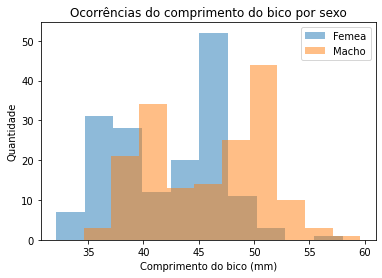

In [136]:
d1_m = dados.loc[dados.sexo == "MALE", "comp_bico"]
d1_f = dados.loc[dados.sexo == "FEMALE", "comp_bico"]

plt.hist(d1_f, alpha = 0.5, label = "Femea")
plt.hist(d1_m, alpha = 0.5, label = "Macho")

plt.title("Ocorrências do comprimento do bico por sexo")
plt.ylabel("Quantidade")
plt.xlabel("Comprimento do bico (mm)")
plt.legend()
plt.show()

Para o efeito do sexo, podemos ver que os individuos do sexo masculino apresentaram maiores frequencias para as medidas maiores em relação aos individos do sexo feminimo.

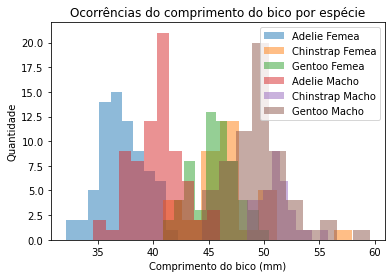

In [133]:
d1_m = dados.loc[(dados.especie=="Adelie") & (dados.sexo == "MALE"), "comp_bico"]
d1_f = dados.loc[(dados.especie=="Adelie") & (dados.sexo == "FEMALE"), "comp_bico"]

d2_m = dados.loc[(dados.especie=="Chinstrap") & (dados.sexo == "MALE"), "comp_bico"]
d2_f = dados.loc[(dados.especie=="Chinstrap") & (dados.sexo == "FEMALE"), "comp_bico"]

d3_m = dados.loc[(dados.especie=="Gentoo") & (dados.sexo == "MALE"), "comp_bico"]
d3_f = dados.loc[(dados.especie=="Gentoo") & (dados.sexo == "FEMALE"), "comp_bico"]


plt.hist(d1_f, alpha = 0.5, label = "Adelie Femea")
plt.hist(d2_f, alpha = 0.5, label = "Chinstrap Femea")
plt.hist(d3_f, alpha = 0.5, label = "Gentoo Femea")
plt.hist(d1_m, alpha = 0.5, label = "Adelie Macho")
plt.hist(d2_m, alpha = 0.5, label = "Chinstrap Macho")
plt.hist(d3_m, alpha = 0.5, label = "Gentoo Macho")
plt.title("Ocorrências do comprimento do bico por especie e sexo")
plt.ylabel("Quantidade")
plt.xlabel("Comprimento do bico (mm)")
plt.legend()
plt.show()

Quando analisada a interação entre os efeitos de espécie e sexo, podemos observar que a mesma caracteristica dos efeitos simples se repetem. Sendo que detro das espécies os machos apresentam bicos maiores que as femeas, em média. Destaca-se que os machos da espécie adelie apresentam, em média, bicos menos compridos do que as femeas das outras espécies avaliadas. Ainda foi possível observar que as maiores medidas estão associadas a indiduos masculinos da espécie gentoo e feminino da especie chinstrap.

### 7.  Relação entre as características avaliadas 

In [146]:
corr = dados.corr()
corr

,comp_bico,prof_bico,comp_nadadeira,massa
comp_bico,1.000000,-0.228626,0.653096,0.589451
prof_bico,-0.228626,1.000000,-0.577792,-0.472016
comp_nadadeira,0.653096,-0.577792,1.000000,0.872979
massa,0.589451,-0.472016,0.872979,1.000000


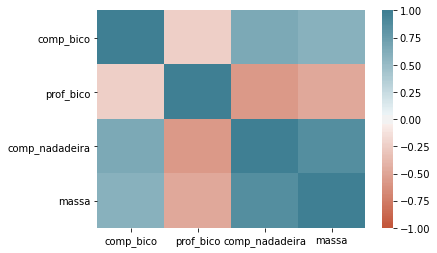

In [147]:
#plotando coeficientes de correlação em um mapa de calor
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

A análise de correlação linear de Pearson e um mapa de calor dessa foram elaborados com as caracterisitcas avaliadas, sem distinção de espécie e sexo. Por meio deles foi possivel observar que (em modulo) a maior correlação observada foi entre o comprimento da nadadeira e a massa corporal (r=0,87) e que a profundidade do bico apresenta as menores correlações com as demais características avaliadas. 
Foram elaborados gráficos de dispersão entre essas variaives para observar o comportamento dessas relações.

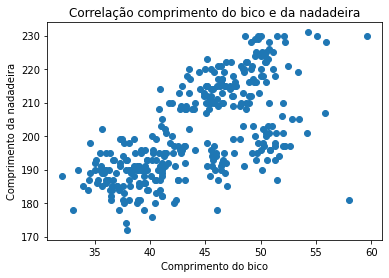

In [137]:
plt.scatter(dados.comp_bico,dados.comp_nadadeira)
plt.xlabel('Comprimento do bico (mm)')
plt.ylabel('Comprimento da nadadeira (mm)')
plt.title('Correlação comprimento do bico e da nadadeira')
plt.show()

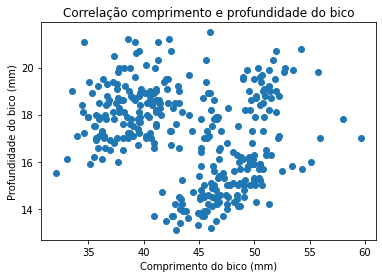

In [141]:
plt.scatter(dados.comp_bico,dados.prof_bico)
plt.xlabel('Comprimento do bico (mm)')
plt.ylabel('Profundidade do bico (mm)')
plt.title('Correlação comprimento e profundidade do bico')
plt.show()

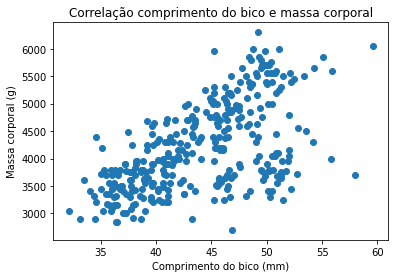

In [140]:
plt.scatter(dados.comp_bico,dados.massa)
plt.xlabel('Comprimento do bico (mm)')
plt.ylabel('Massa corporal (g)')
plt.title('Correlação comprimento do bico e massa corporal')
plt.show()

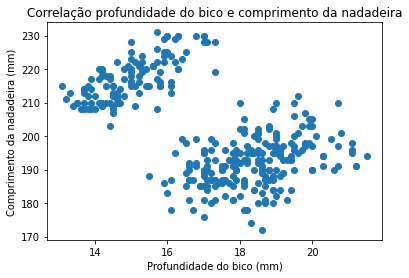

In [142]:
plt.scatter(dados.prof_bico, dados.comp_nadadeira)
plt.xlabel('Profundidade do bico (mm)')
plt.ylabel('Comprimento da nadadeira (mm)')
plt.title('Correlação profundidade do bico e comprimento da nadadeira')
plt.show()

Text(0, 0.5, 'Comprimento da nadadeira')

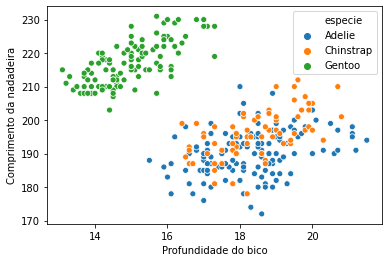

In [174]:
sns.scatterplot(x="prof_bico",
                y="comp_nadadeira",
                hue="especie",
                data=dados)
plt.xlabel("Profundidade do bico")
plt.ylabel("Comprimento da nadadeira")

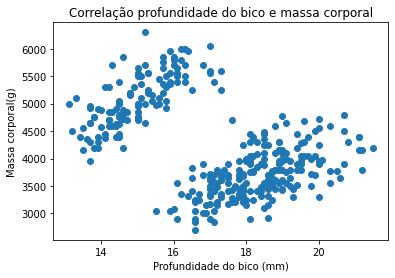

In [144]:
plt.scatter(dados.prof_bico, dados.massa)
plt.xlabel('Profundidade do bico (mm)')
plt.ylabel('Massa corporal(g)')
plt.title('Correlação profundidade do bico e massa corporal')
plt.show()

Text(0, 0.5, 'Massa corporal')

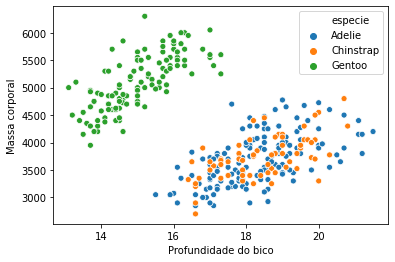

In [175]:
sns.scatterplot(x="prof_bico",
                y="massa",
                hue="especie",
                data=dados)
plt.xlabel("Profundidade do bico")
plt.ylabel("Massa corporal")

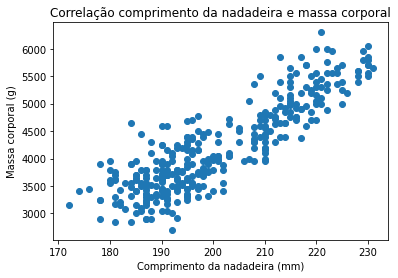

In [145]:
plt.scatter(dados.comp_nadadeira, dados.massa)
plt.xlabel('Comprimento da nadadeira (mm)')
plt.ylabel('Massa corporal (g)')
plt.title('Correlação comprimento da nadadeira e massa corporal')
plt.show()

Destacam-se as correlações envolvendo a profundidade do bico com massa corporal e comprimento da nadadeira. Nestas foi possivel observar um efeito diferenciado para a espécie gentoo das demais, por isso foram eladorados gráficos destacando-se essas caracteristicas em função da espécie.

### 8. Transformação dos dados
Devido as diferenças de escala, abaixo são apresentadas duas técnicas passiveis de serem utilizadas para a transformação da escala dos dados. 
No primeiro gráfico é possivel observar a diferença da escala da massa em relação as demais variaveis, após a transformação pelo máximo e pelo máximo e minimo essa diferença é atenuada. 

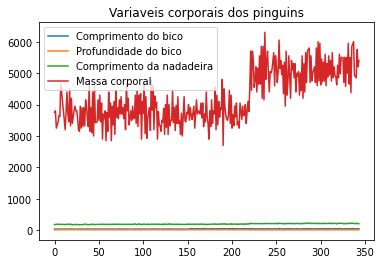

In [150]:
#plotando textura e area em um mesmo gráfico
plt.plot(dados.comp_bico,label='Comprimento do bico')
plt.plot(dados.prof_bico,label='Profundidade do bico')
plt.plot(dados.comp_nadadeira,label='Comprimento da nadadeira')
plt.plot(dados.massa,label='Massa corporal')

plt.title('Variaveis corporais dos pinguins')
plt.legend()
plt.show()

In [160]:
#Reescala
comp_bico = dados.comp_bico
comp_bico = comp_bico/comp_bico.max()

comp_nadadeira = dados.comp_nadadeira
comp_nadadeira = comp_nadadeira/comp_nadadeira.max()

prof_bico = dados.prof_bico
prof_bico = prof_bico/prof_bico.max()

massa = dados.massa
massa = massa/massa.max()

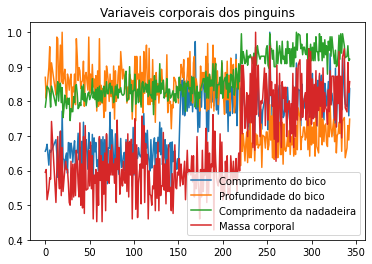

In [161]:
plt.plot(comp_bico,label='Comprimento do bico')
plt.plot(prof_bico,label='Profundidade do bico')
plt.plot(comp_nadadeira,label='Comprimento da nadadeira')
plt.plot(massa,label='Massa corporal')

plt.title('Variaveis corporais dos pinguins normalizadas pelo máximo')
plt.legend()
plt.show()

In [163]:
#Reescala
comp_bico = dados.comp_bico
comp_bico = (comp_bico - comp_bico.min())/(comp_bico.max() - comp_bico.min())

comp_nadadeira = dados.comp_nadadeira
comp_nadadeira = (comp_nadadeira - comp_nadadeira.min())/(comp_nadadeira.max()- comp_nadadeira.min())

prof_bico = dados.prof_bico
prof_bico = (prof_bico- prof_bico.min())/(prof_bico.max()- prof_bico.min())

massa = dados.massa
massa = (massa-massa.min())/(massa.max()- massa.min())

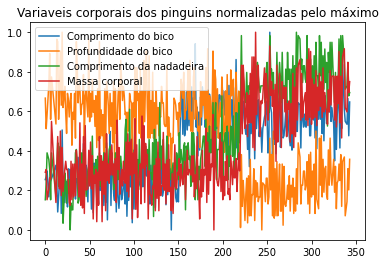

In [164]:
plt.plot(comp_bico,label='Comprimento do bico')
plt.plot(prof_bico,label='Profundidade do bico')
plt.plot(comp_nadadeira,label='Comprimento da nadadeira')
plt.plot(massa,label='Massa corporal')

plt.title('Variaveis corporais dos pinguins normalizadas pelo máximo e minimo')
plt.legend()
plt.show()